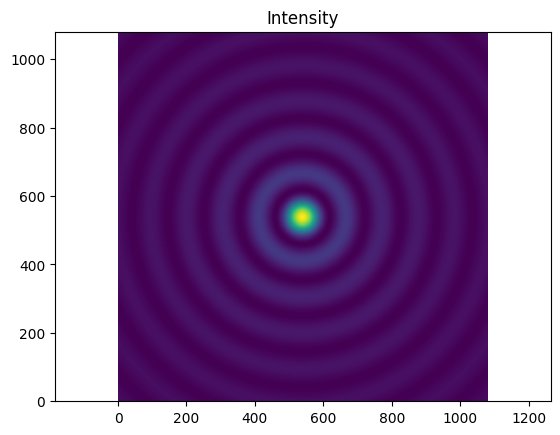

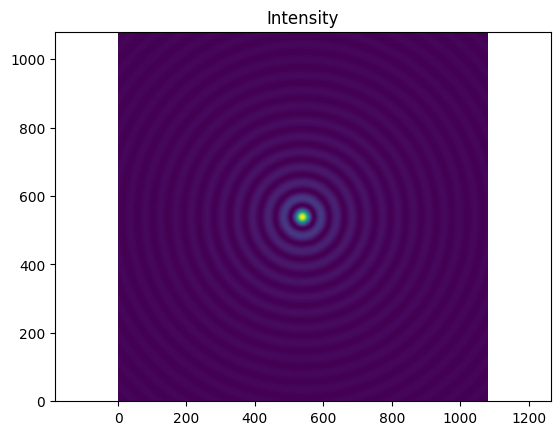

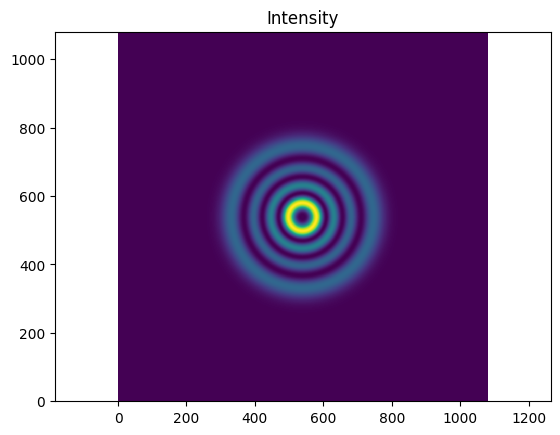

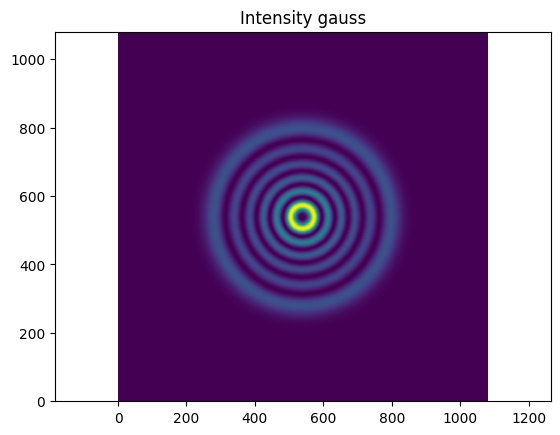

In [ ]:
import matplotlib.pyplot as plt, math
from scipy.special import jv, binom
import numpy as np
from scipy.fft import fft2, fftshift, ifft2

# Generar muestras OAM Gauss Laguerre

Nx = 1080
Ny = 1080

m = int(Nx - 1/2) + 1


x, y = np.meshgrid(np.linspace(-Nx/2, (Nx-1)/2, m), np.linspace(-Ny/2, (Ny-1)/2, m))
r = np.sqrt(x**2+y**2)
phi = np.arctan2(y, x)

# Bessel Beam
nb = 0
vortex_Bessel_03 = jv(nb, 0.03*r)*np.exp(1j*nb*phi)
vortex_Bessel_07 = jv(nb, 0.07*r)*np.exp(1j*nb*phi)
Bessel_03 = vortex_Bessel_03/vortex_Bessel_03.max()
Bessel_07 = vortex_Bessel_07/vortex_Bessel_07.max()


# Laguerre-Gauss
L = np.array([-2, 2, -2, 1, -1, 0, 0, 0, 0])
P = np.array([3, 9, 5, 0, 5, 3, 0, 0, 0])

W0 = 80
x_aux = 2*(r**2)/W0**2
x_aux1 = np.sqrt(2*(r**2)/W0**2)

matriz = np.zeros((Ny, L.shape[0] * Nx), dtype=complex)
for i in range(1, L.shape[0] + 1):
    Clp = math.sqrt(2 * math.factorial(P[i - 1]) / (math.pi * math.factorial(P[i - 1] + abs(L[i - 1]))))
    PolLaguerre = binom(P[i - 1] + abs(L[i - 1]), P[i - 1]) * np.ones((Ny, Nx))

    for m in range(1, P[i - 1] + 1):
        PolLaguerre += (-1) ** m / math.factorial(m) * \
                       binom(P[i - 1] + abs(L[i - 1]), P[i - 1] - m) * x_aux1 ** (
                                   2 * m)

    vortex_aux = Clp * (1 / W0) * ((r * math.sqrt(2) / W0) ** abs(L[i - 1])) * np.exp(-(r ** 2) / (W0 ** 2)) * \
                 PolLaguerre * np.exp(1j * (L[i - 1] * phi))

    matriz[:, (i - 1) * vortex_aux.shape[1]:i * vortex_aux.shape[1]] = vortex_aux
    alto, ancho = vortex_aux.shape[:2]

vortex1 = matriz[:, 0 * vortex_aux.shape[1]:1 * vortex_aux.shape[1]]
vortex3 = matriz[:, 2 * vortex_aux.shape[1]:3 * vortex_aux.shape[1]]
LG_m2_3 = vortex1/vortex1.max()
LG_m2_5 = vortex3/vortex3.max()

plt.figure()
plt.title('Intensity')
plt.pcolor(abs(Bessel_03)**2)
plt.axis('equal')
plt.show()

plt.figure()
plt.title('Intensity')
plt.pcolor(abs(Bessel_07)**2)
plt.axis('equal')
plt.show()

plt.figure()
plt.title('Intensity')
plt.pcolor(abs(LG_m2_3)**2)
plt.axis('equal')
plt.show()

plt.figure()
plt.title('Intensity gauss')
plt.pcolor(abs(LG_m2_5)**2)
plt.axis('equal')
plt.show()

In [ ]:
#Turbulence
r0 = 0.5
psd = 0.023 * (r0 ** (-5 / 3)) * r ** (-11 / 3)  # kolmogorov phi

def random_phase():
  matriz_aleatoria = np.zeros((phi.shape[0], phi.shape[1]), dtype=complex)
  for i in range(phi.shape[0]):
      for j in range(phi.shape[1]):
          randomcoeffs = np.random.rand() + 1j*np.random.rand()
          matriz_aleatoria[i][j] += randomcoeffs

  # fourier transform
  phase = np.real(fft2(fftshift(np.sqrt(psd) * matriz_aleatoria)))
  # phase screens
  phase_screens = np.exp(1j*2*np.pi*phase)
  return phase_screens

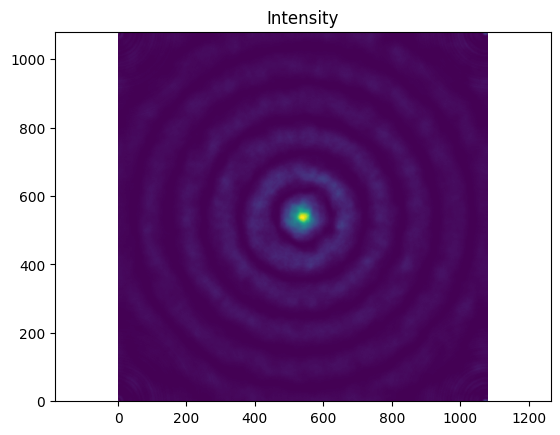

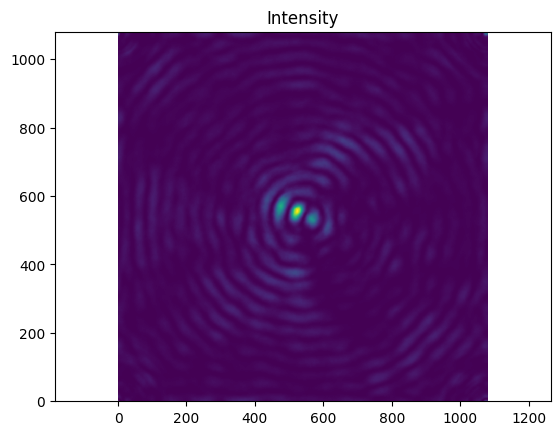

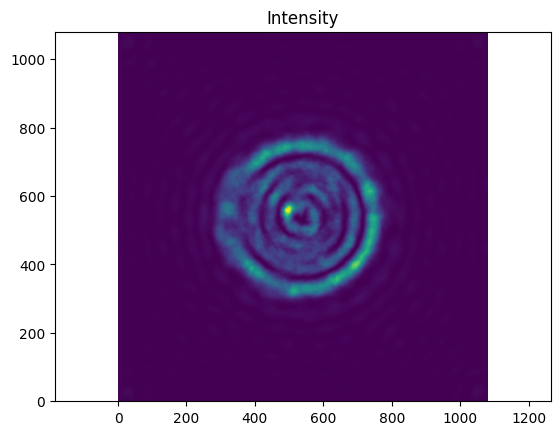

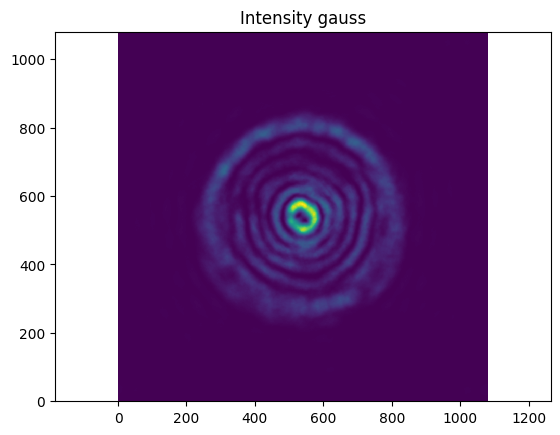

In [ ]:

# Turbulence plots

# since a phase acts in a fixed time point, we need a propagator(fourier optics), other way plotting OAM*phase_screens will be equals OAM
def propagator(any_OAM) -> np.ndarray:
  lambda_ = 637e-9
  medio = random_phase()
  Psi = any_OAM * medio
  F_psi = fftshift(fft2(Psi))
  z = 1e11

  step_F = 1/Nx
  ne = np.arange(-Nx/2, Nx/2)
  u = ne * step_F

  U, V = np.meshgrid(u, u)
  V = U.T
  FP_prop = np.exp(1j * (2 * np.pi * z / lambda_) * np.sqrt(1 - (lambda_**2) * (U**2 + V**2)))
  F_NoisyF = F_psi*FP_prop
  NoisyF = ifft2(fftshift(F_NoisyF))
  return NoisyF
# end of prop

plt.figure()
plt.title('Intensity')
plt.pcolor(abs(propagator(Bessel_03))**2)
plt.axis('equal')
plt.show()

plt.figure()
plt.title('Intensity')
plt.pcolor(abs(propagator(Bessel_07))**2)
plt.axis('equal')
plt.show()

plt.figure()
plt.title('Intensity')
plt.pcolor(abs(propagator(LG_m2_3))**2)
plt.axis('equal')
plt.show()

plt.figure()
plt.title('Intensity gauss')
plt.pcolor(abs(propagator(LG_m2_5))**2)
plt.axis('equal')
plt.show()



In [ ]:
# muestras

OAM_G_L_1 = [None for _ in range(100)]
OAM_B_1   = [None for _ in range(100)]

OAM_G_L_2 = [None for _ in range(100)]
OAM_B_2   = [None for _ in range(100)]

for i in range(100):
  OAM_G_L_1[i] = propagator(LG_m2_3)
  OAM_G_L_2[i] = propagator(LG_m2_5)
  OAM_B_1[i]   = propagator(Bessel_03)
  OAM_B_2[i]   = propagator(Bessel_07)



(180, 180)
(1080, 1080)


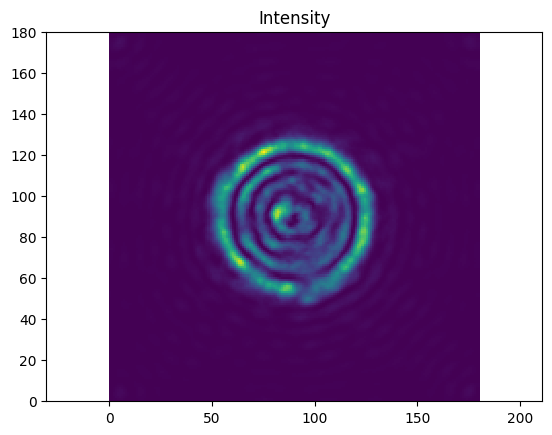

400


In [ ]:
# Modelo 1

import random


OAM = OAM_G_L_1[0].reshape(180, 6, 180, 6).mean(axis=(1,3))
print(OAM.shape)
print(OAM_G_L_1[0].shape)

plt.figure()
plt.title('Intensity')
plt.pcolor(abs(OAM)**2)
plt.axis('equal')
plt.show()


training_d = []

for oam in OAM_G_L_1:
  OAM = oam.reshape(180, 6, 180, 6).mean(axis=(1,3))
  OAM = abs(OAM)**2
  training_d.append([OAM, '0'])

for oam in OAM_G_L_2:
  OAM = oam.reshape(180, 6, 180, 6).mean(axis=(1,3))
  OAM = abs(OAM)**2
  training_d.append([OAM, '1'])

for oam in OAM_B_1:
  OAM = oam.reshape(180, 6, 180, 6).mean(axis=(1,3))
  OAM = abs(OAM)**2
  training_d.append([OAM, '2'])

for oam in OAM_B_2:
  OAM = oam.reshape(180, 6, 180, 6).mean(axis=(1,3))
  OAM = abs(OAM)**2
  training_d.append([OAM, '3'])

print(len(training_d))

random.shuffle(training_d)


(180, 180)
1.458420088144018e-07
0.379629693363088
3


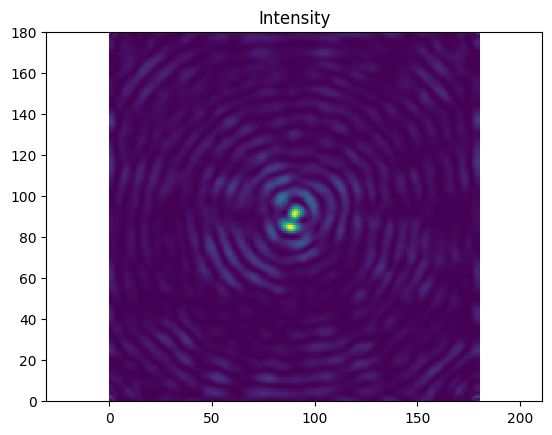

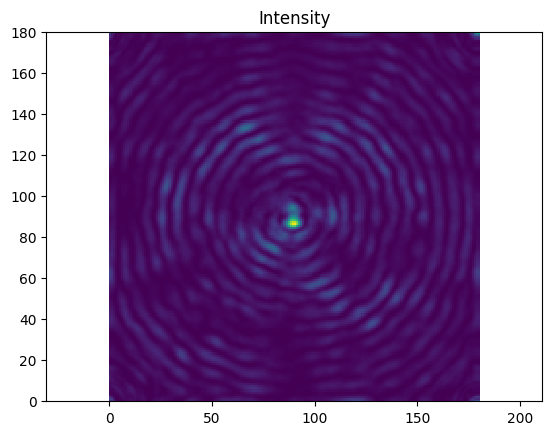

3


In [ ]:
print(training_d[0][0].shape)
print(training_d[0][0].min())
print(training_d[0][0].max())
print(training_d[3][1])
plt.figure()
plt.title('Intensity')
plt.pcolor(training_d[3][0])
plt.axis('equal')
plt.show()

plt.figure()
plt.title('Intensity')
plt.pcolor(training_d[0][0])
plt.axis('equal')
plt.show()
print(training_d[0][1])

In [ ]:
from keras.utils import to_categorical
X = []
Y = []

for features, label in training_d: # no podemosmpasar una lista a la red por ende debe ser pasado a np array
    X.append(features)
    Y.append(label)
X = np.array(X)
Y = np.array(Y)
if len(Y.shape) == 1:
  print('si')
  Y = to_categorical(Y, num_classes=4)


si


In [ ]:
import pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
# Conv2D: Capa de convolución 2D que se utiliza para extraer características de imágenes.
# Dense: Capa completamente conectada, donde cada nodo está conectado a cada nodo en la capa anterior.
# Dropout: Técnica de regularización que previene el sobreajuste eliminando algunas conexiones de manera aleatoria durante el entrenamiento.
# Activation: Función de activación que añade no linealidad a la red.
# Flatten: Aplana las entradas, convirtiendo una matriz multidimensional en un vector de una sola dimensión.
# MaxPooling2D: Reduce el tamaño espacial de la representación (downsampling), lo que ayuda a disminuir la cantidad de parámetros y el tiempo de cómputo.

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)

print(X[15])
print(Y[15])

# Definir el modelo
model = Sequential()


model.add(Conv2D(64, (3, 3), input_shape=(180, 180, 1))) # (3,3) ventana a usar, forma de entrada porque es 180x180 x1, 64 unidades
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(64, activation='relu'))

model.add(Dense(4, activation='softmax')) # 6 outputs
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])



hist = model.fit(X, Y, batch_size=32, epochs=4, validation_split=0.1)

[[5.65659273e-05 1.43774811e-04 1.21479185e-04 ... 7.58376785e-04
  2.69715922e-04 2.08337335e-05]
 [1.77711118e-04 3.61391892e-04 4.41771867e-04 ... 9.45775545e-04
  2.99706930e-04 1.97545698e-05]
 [3.91366014e-04 7.38419471e-04 1.13461743e-03 ... 1.31002157e-03
  4.56141298e-04 1.98311237e-04]
 ...
 [2.23068698e-05 2.02888880e-04 3.74133447e-04 ... 1.14462202e-03
  5.04915183e-04 1.29892159e-04]
 [1.86714050e-05 1.33192895e-04 1.95726249e-04 ... 7.39237930e-04
  2.80041940e-04 1.17277964e-04]
 [2.45100536e-06 2.12112724e-05 6.72373161e-05 ... 7.30433588e-04
  2.77961841e-04 4.32083734e-05]]
[0. 1. 0. 0.]
Epoch 1/4
12/12 [==============================] - 33s 3s/step - loss: 0.3708 - accuracy: 0.8111 - val_loss: 2.0346e-04 - val_accuracy: 1.0000
Epoch 2/4
12/12 [==============================] - 33s 3s/step - loss: 7.3824e-05 - accuracy: 1.0000 - val_loss: 4.6552e-05 - val_accuracy: 1.0000
Epoch 3/4
12/12 [==============================] - 32s 3s/step - loss: 2.8056e-05 - accuracy: 1.

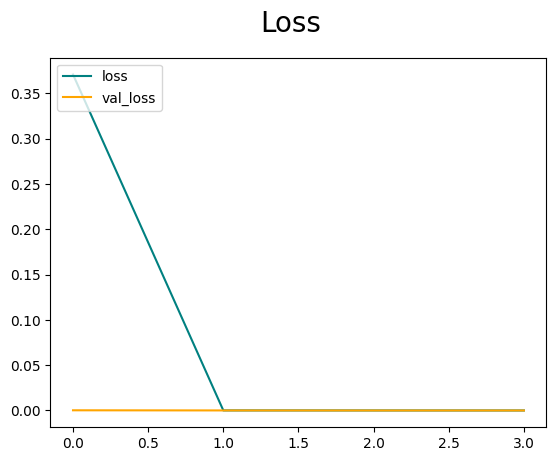

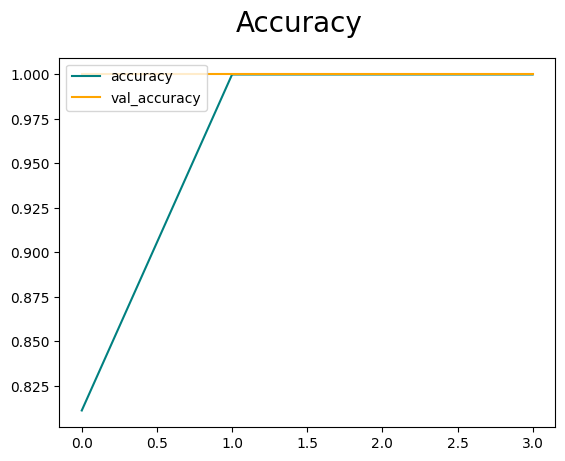

In [ ]:
#Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
import random

OAM_G_L_test1 = [None for _ in range(2)]
OAM_B_test1   = [None for _ in range(2)]
OAM_G_L_test2 = [None for _ in range(2)]
OAM_B_test2   = [None for _ in range(2)]


for i in range(2):
  OAM_B_test1[i] = propagator(Bessel_03)
  OAM_G_L_test1[i]   = propagator(LG_m2_3)
  OAM_G_L_test2[i] = propagator(Bessel_07)
  OAM_B_test2[i]   = propagator(LG_m2_5)


test_d = []

for oam in OAM_G_L_test1:
  OAM = oam.reshape(180, 6, 180, 6).mean(axis=(1,3))
  OAM = abs(OAM)**2
  test_d.append(OAM)

for oam in OAM_B_test1:
  OAM = oam.reshape(180, 6, 180, 6).mean(axis=(1,3))
  OAM = abs(OAM)**2
  test_d.append(OAM)

for oam in OAM_G_L_test2:
  OAM = oam.reshape(180, 6, 180, 6).mean(axis=(1,3))
  OAM = abs(OAM)**2
  test_d.append(OAM)

for oam in OAM_B_test2:
  OAM = oam.reshape(180, 6, 180, 6).mean(axis=(1,3))
  OAM = abs(OAM)**2
  test_d.append(OAM)

print(len(test_d))

random.shuffle(test_d)



8


In [ ]:
test_d = np.array(test_d)
model.save('oam.model')
new_model = tf.keras.models.load_model('oam.model')

OAM_G_L_test1 = propagator(Bessel_03)
OAM_G_L_test1 = abs(OAM_G_L_test1)**2
OAM_G_L_test1 = OAM_G_L_test1.reshape(180, 6, 180, 6).mean(axis=(1,3))
OAM_G_L_test2 = propagator(LG_m2_3)
OAM_G_L_test2 = abs(OAM_G_L_test2)**2
OAM_G_L_test2 = OAM_G_L_test2.reshape(180, 6, 180, 6).mean(axis=(1,3))

OAM_G_L_test3 = propagator(LG_m2_5)
OAM_G_L_test3 = abs(OAM_G_L_test3)**2
OAM_G_L_test3 = OAM_G_L_test3.reshape(180, 6, 180, 6).mean(axis=(1,3))

OAM_G_L_test4 = propagator(Bessel_07)
OAM_G_L_test4 = abs(OAM_G_L_test4)**2
OAM_G_L_test4 = OAM_G_L_test4.reshape(180, 6, 180, 6).mean(axis=(1,3))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 178, 178, 64)      640       
                                                                 
 activation_6 (Activation)   (None, 178, 178, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 87, 87, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                 

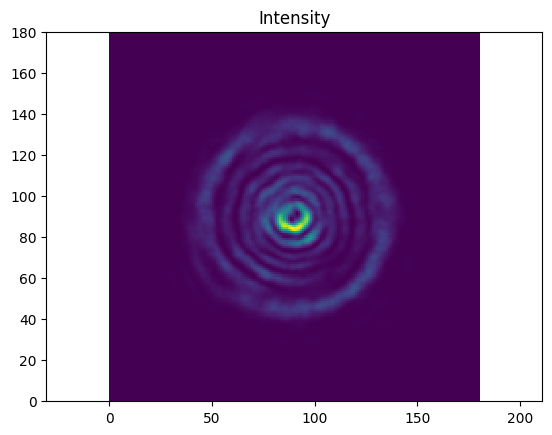

In [ ]:
new_model.summary()
plt.figure()
plt.title('Intensity')
plt.pcolor(test_d[5])
plt.axis('equal')
plt.show()

In [ ]:
predictions = new_model.predict(np.expand_dims(OAM_G_L_test1, 0))
print('bessel 1 ')
print(predictions)
print(predictions[0][0])
print(predictions[0])
print(np.argmax(predictions[0][0]))

print('bessel 2 ')
predictions = new_model.predict(np.expand_dims(OAM_G_L_test4, 0))
print(predictions)

print('gauss lag')
predictions = new_model.predict(np.expand_dims(OAM_G_L_test2, 0))
print(predictions)
print(np.argmax(predictions[0][0]))

print('gauss lag 2')
predictions = new_model.predict(np.expand_dims(OAM_G_L_test3, 0))
print(predictions)
print(np.argmax(predictions[0][0]))

# predicciones arreglo
predictions = new_model.predict([test_d])
print(predictions)


1/1 [==============================] - 0s 136ms/step
bessel 1 
[[4.3193832e-14 6.4195420e-11 9.9999261e-01 7.3985548e-06]]
4.3193832e-14
[4.3193832e-14 6.4195420e-11 9.9999261e-01 7.3985548e-06]
0
bessel 2 
1/1 [==============================] - 0s 105ms/step
[[1.1600849e-18 4.4094812e-15 3.1056459e-13 1.0000000e+00]]
gauss lag
1/1 [==============================] - 0s 161ms/step
[[1.0000000e+00 9.6869455e-29 5.6745811e-29 1.2747344e-28]]
0
gauss lag 2
1/1 [==============================] - 0s 123ms/step
[[7.3363420e-29 1.0000000e+00 2.1129751e-29 3.8162663e-28]]
0
1/1 [==============================] - 1s 650ms/step
[[2.11030112e-21 9.99999940e-01 9.81083443e-26 1.85215958e-22]
 [1.22467285e-14 2.41121151e-11 9.99998391e-01 1.52690484e-06]
 [9.99999940e-01 3.63382719e-16 5.05559219e-22 2.63734049e-25]
 [6.31556193e-15 2.56327425e-11 9.99999225e-01 7.59754982e-07]
 [4.88786452e-19 3.95002736e-14 4.05343158e-13 9.99999940e-01]
 [1.74334125e-18 9.99999940e-01 2.22765358e-23 2.34470060e-2

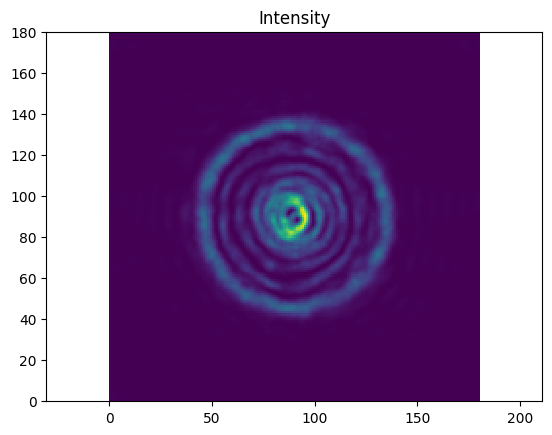

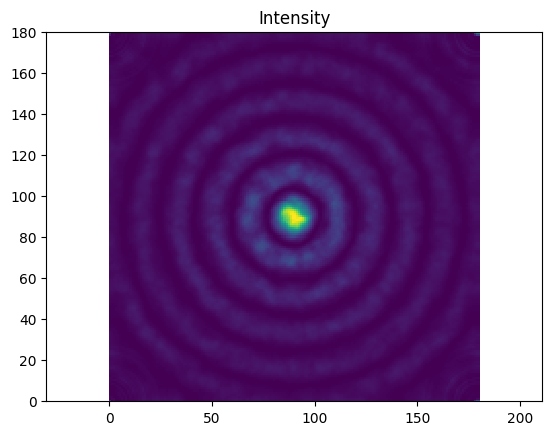

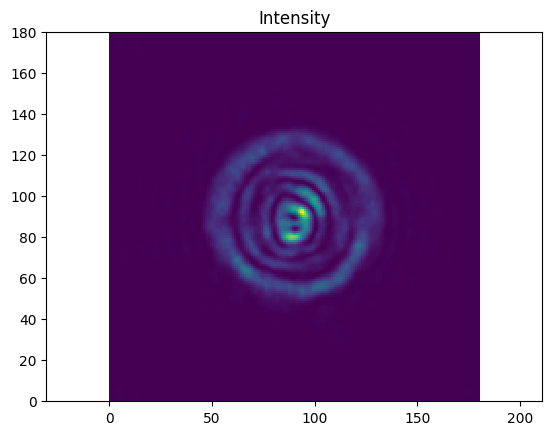

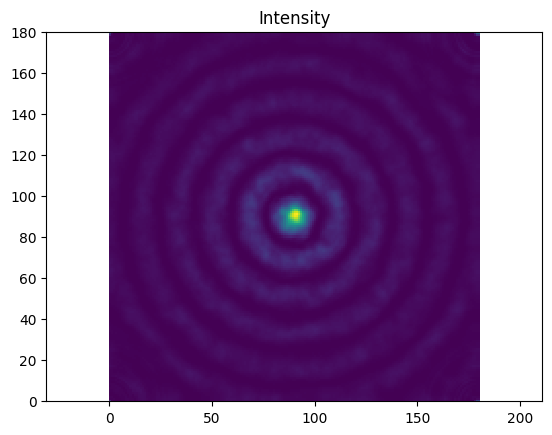

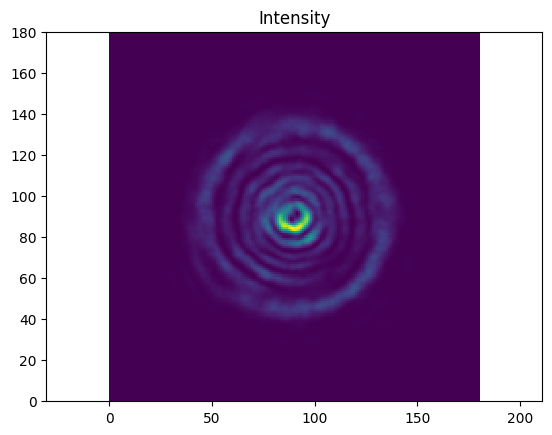

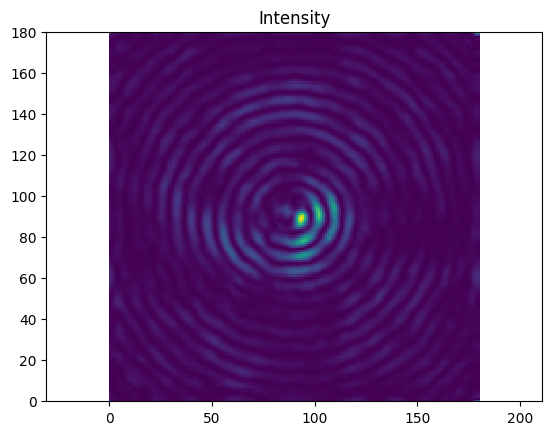

In [ ]:
plt.figure()
plt.title('Intensity')
plt.pcolor(test_d[0])
plt.axis('equal')
plt.show()

plt.figure()
plt.title('Intensity')
plt.pcolor(test_d[1])
plt.axis('equal')
plt.show()

plt.figure()
plt.title('Intensity')
plt.pcolor(test_d[2])
plt.axis('equal')
plt.show()

plt.figure()
plt.title('Intensity')
plt.pcolor(test_d[3])
plt.axis('equal')
plt.show()

plt.figure()
plt.title('Intensity')
plt.pcolor(test_d[5])
plt.axis('equal')
plt.show()

plt.figure()
plt.title('Intensity')
plt.pcolor(test_d[7])
plt.axis('equal')
plt.show()